In [0]:
import pandas as pd
import numpy as np
import timeit
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from ipywidgets import interact
%matplotlib inline

In [0]:
def normalize(X):
    mu = np.mean(X, axis=0)     # Compute the mean of X
    std = np.std(X, axis=0)     # Compute the std of X
    std_filled = std.copy()
    std_filled[std==0] = 1.
    Xbar = (X - mu)/std_filled  # Compute the normalized data Xbar
    return Xbar, mu, std     

In [0]:
df2 = pd.read_csv("/content/GLC03122015_latest.csv", header='infer')

x = df2.iloc[:7,:]
X = x.values
print(X.shape)
Xbar, mu, std = normalize(X)
print(Xbar.shape)
print(mu.shape)
print(std.shape)
print(np.trace(Xbar))


(7, 11)
(7, 11)
(11,)
(11,)
1.5414276425537436


In [0]:
def eig_sorted(S):
    eigvals, eigvecs = np.linalg.eig(S)
    idx = eigvals.argsort()[::-1]   
    eigvals = eigvals[idx]
    eigvecs = eigvecs[:,idx]
    return (eigvals, eigvecs) 


In [0]:
def eig_unsorted(S):
    eigvals, eigvecs = np.linalg.eig(S)
    return (eigvals,eigvecs)

In [0]:
def projection_matrix(B):
    P = np.matmul(B,B.T) 
    return P 

In [0]:
def PCA_sorted(X, num_components):
    Xbar,mu,std=normalize(X)
    covariance=np.matmul(Xbar,Xbar.T)
    S=covariance
    eigvals,eigvecs=eig_sorted(S)
    eigenSum = eigvals[:num_components].sum()
    B = np.stack(eigvecs[:,:num_components])
    P = np.matmul(B,B.T)
    X_reconstruct=np.matmul(P,X)
    X_reconstruct=X_reconstruct
    return eigenSum, X_reconstruct


In [0]:
def PCA_unsorted(X, num_components):
    Xbar,mu,std=normalize(X)
    covariance=np.matmul(Xbar,Xbar.T)
    S=covariance
    eigvals,eigvecs=eig_unsorted(S)
    B = np.stack(eigvecs[:,:num_components])
    P = np.matmul(B,B.T)
    X_reconstruct=np.matmul(P,X)
    X_reconstruct=X_reconstruct
    return X_reconstruct 
    


In [0]:
covariance = np.matmul(Xbar,Xbar.T)
print(covariance.shape)
print(np.trace(covariance))
S = covariance

(7, 7)
77.00000000000001


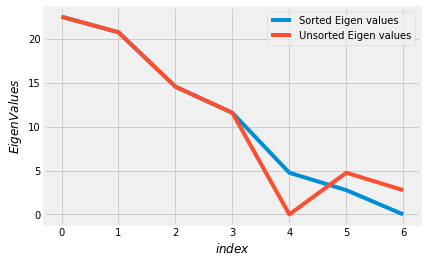

In [0]:
sorted_eigvals, sorted_eigvecs = eig_sorted(S)
unsorted_eigvals, unsorted_eigvecs = eig_unsorted(S)
plt.plot(sorted_eigvals, label = 'Sorted Eigen values')
plt.plot(unsorted_eigvals, label = 'Unsorted Eigen values')
plt.xlabel("$index$")
plt.ylabel("$EigenValues$")
plt.legend()


In [0]:
def mse(predict, actual):
    return np.square(predict - actual).sum(axis=1).mean()


In [0]:

loss_1 = []
variance = []
reconstructions_1 = []
# iterate over different numbers of principal components, and compute the MSE
for num_component in range(1, 14):
    eigenSum, reconst_1 = PCA_sorted(Xbar, num_component)
    error_1 = mse(reconst_1, Xbar)
    reconstructions_1.append(reconst_1)
    variance.append((num_component, eigenSum))
    loss_1.append((num_component, error_1))

reconstructions_1 = np.asarray(reconstructions_1)
reconstructions_1 = reconstructions_1 * std + mu # "unnormalize" the reconstructed image
loss_1 = np.asarray(loss_1)

variance = np.asarray(variance)

In [0]:
loss_2 = []
reconstructions_2 = []
# iterate over different numbers of principal components, and compute the MSE
for num_component in range(1, 14):
    reconst_2 = PCA_unsorted(Xbar, num_component)
    error_2 = mse(reconst_2, Xbar)
    reconstructions_2.append(reconst_2)
    loss_2.append((num_component, error_2))

reconstructions_2 = np.asarray(reconstructions_2)
reconstructions_2 = reconstructions_2 * std + mu # "unnormalize" the reconstructed image
loss_2 = np.asarray(loss_2)


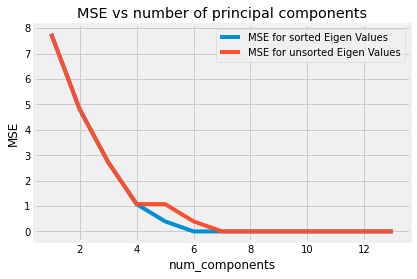

In [0]:
fig, ax = plt.subplots()
ax.plot(loss_1[:,0], loss_1[:,1], label = 'MSE for sorted Eigen Values');
ax.plot(loss_2[:,0], loss_2[:,1], label = 'MSE for unsorted Eigen Values');
ax.set(xlabel='num_components', ylabel='MSE', title='MSE vs number of principal components');
plt.legend()

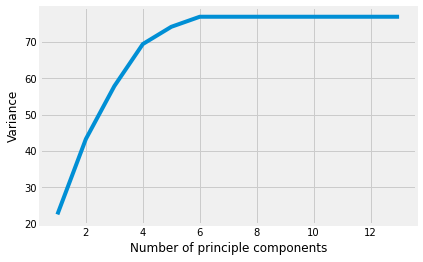

In [0]:
plt.plot(variance[:,0], variance[:,1])
plt.xlabel("Number of principle components")
plt.ylabel("Variance");
